## Importing libraries

In [152]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

## Reading Dataset

In [153]:

# Read the dataset into a pandas DataFrame4[]
df = pd.read_csv('netflix_titles.csv')

# Set pandas display options to show all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Choose how many rows to display
num_rows_to_display = 5 # Change this to the desired number of rows

# Display the DataFrame
display(df.iloc[:num_rows_to_display, :12])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Identify columns with missing values

In [154]:

missing_values = df.isnull().sum()
print("Columns with missing values:\n")
print(missing_values[missing_values > 0])


Columns with missing values:

director    480
cast        152
country     360
dtype: int64


## Remove unnecessary columns with many missing values

In [155]:

df_cleaned = df.dropna(axis=1, thresh=len(df) * 0.9)  # Drop columns with more than 90% missing values

# Check the remaining missing values
missing_values_cleaned = df_cleaned.isnull().sum()
print("Remaining missing values after removing unnecessary columns:\n")
print(missing_values_cleaned[missing_values_cleaned > 0])


Remaining missing values after removing unnecessary columns:

Series([], dtype: int64)


In [156]:
df_cleaned 

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...
1497,s1498,Movie,"Hello, Love, Goodbye",24-Dec-20,2019,TV-14,117 min,"Dramas, International Movies, Romantic Movies","In Hong Kong, the lives of two overseas Filipi..."
1498,s1499,Movie,The History of Future Folk,23-Dec-20,2012,TV-14,85 min,"Action & Adventure, Comedies, Independent Movies",An alien ordered to colonize Earth abandons hi...


## Min-Max scaling

In [157]:

# Select numerical columns for scaling
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Perform Min-Max scaling on numerical columns using .loc
scaler = MinMaxScaler()
df_cleaned.loc[:, numerical_columns] = scaler.fit_transform(df_cleaned.loc[:, numerical_columns])

# Display the first few rows of the cleaned and scaled DataFrame
display(df_cleaned.head())


C:\Users\imoaz\AppData\Local\Temp\ipykernel_20868\174888871.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.98684211 1.         1.         ... 0.96052632 0.97368421 0.88157895]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, numerical_columns] = scaler.fit_transform(df_cleaned.loc[:, numerical_columns])


,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,25-Sep-21,0.986842,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,24-Sep-21,1.000000,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,24-Sep-21,1.000000,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,24-Sep-21,1.000000,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,24-Sep-21,1.000000,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## One-hot encoding 

In [173]:

# Set display options to limit the number of rows and columns shown
pd.set_option('display.max_rows', 5)  # Adjust as needed
pd.set_option('display.max_columns', 10)  # Adjust as needed

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df_cleaned)

# Display the first few rows of the encoded DataFrame
df_encoded


,release_year,show_id_s1,show_id_s10,show_id_s100,show_id_s1000,...,description_Yılmaz Erdoğan's lauded stage play traces the life of wunderkind Gülseren as she navigates social and political change.,"description_Zack Snyder and his ""Army of the Dead"" team dive into the film's wild stunts, groundbreaking effects and the evolution of the zombie genre.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.",description_“Last Chance U” hits the hardwood in East Los Angeles as a coach with strong convictions leads young men who hope to fulfill major college potential.
0,0.986842,True,False,False,False,...,False,False,False,False,False
1,1.000000,False,False,False,False,...,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1497,0.973684,False,False,False,False,...,False,False,False,False,False
1498,0.881579,False,False,False,False,...,False,False,False,False,False


## Dataset summary after cleaning

In [174]:
summary_stats = df_encoded.describe()
print("Summary Statistics after cleaning:")
display(summary_stats)

Summary Statistics after cleaning:


,release_year
count,1499.00000
mean,0.92876
...,...
75%,1.00000
max,1.00000


## Data Distributions (Numerical Features)

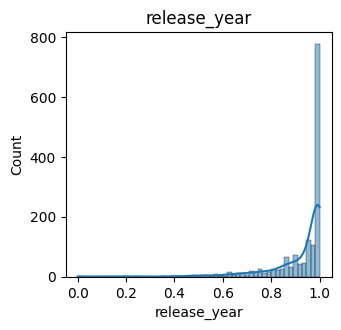

In [175]:

numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df_encoded[numerical_columns]

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df_numerical[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


## Correlation Analysis

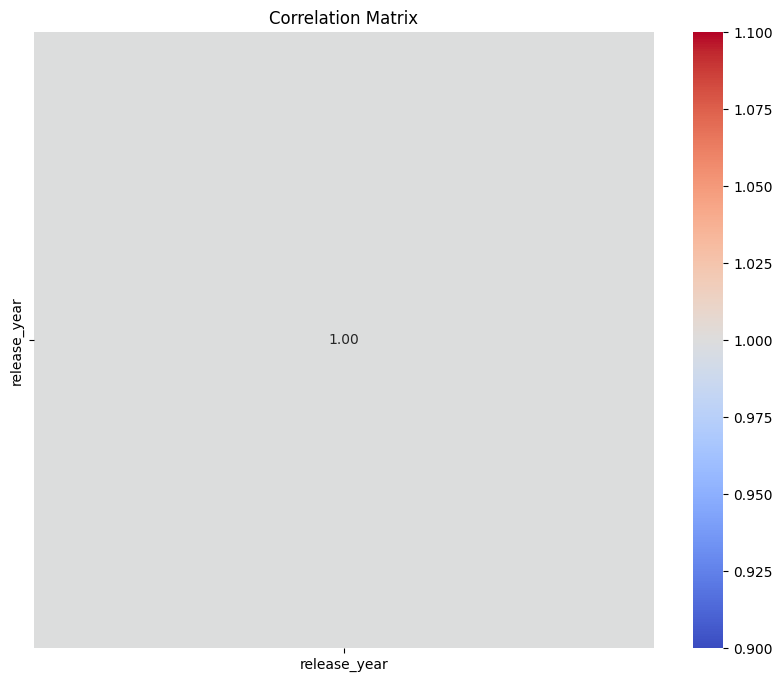

In [176]:
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## 10 Most important features

In [177]:
# Calculate the frequency of each binary feature
binary_feature_counts = df_encoded.sum(axis=0)

# Sort the features by frequency in descending order
binary_feature_counts_sorted = binary_feature_counts.sort_values(ascending=False)

# Display the top 10 most important features
print("Top 10 most important features:")

binary_feature_counts_sorted.head()


Top 10 most important features:


release_year    1392.210526
type_Movie       984.000000
type_TV Show     515.000000
rating_TV-MA     500.000000
rating_TV-14     331.000000
dtype: float64

# KMedoid Clustering

## Determinig optimal number of clusters

In [178]:


# Choose a range of K values
k_values = range(2, 11) 

# Initialize lists to store silhouette scores for each K
silhouette_scores = []

# Perform K-medoids clustering for each K
for k in k_values:
    # Initialize K-medoids model
    kmedoids = KMedoids(n_clusters=k, random_state=42)

    # Fit the model to the encoded DataFrame
    kmedoids.fit(df_encoded)

    # Predict cluster labels
    cluster_labels = kmedoids.labels_

    # Compute silhouette score
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)




## Silhouette scores for each K

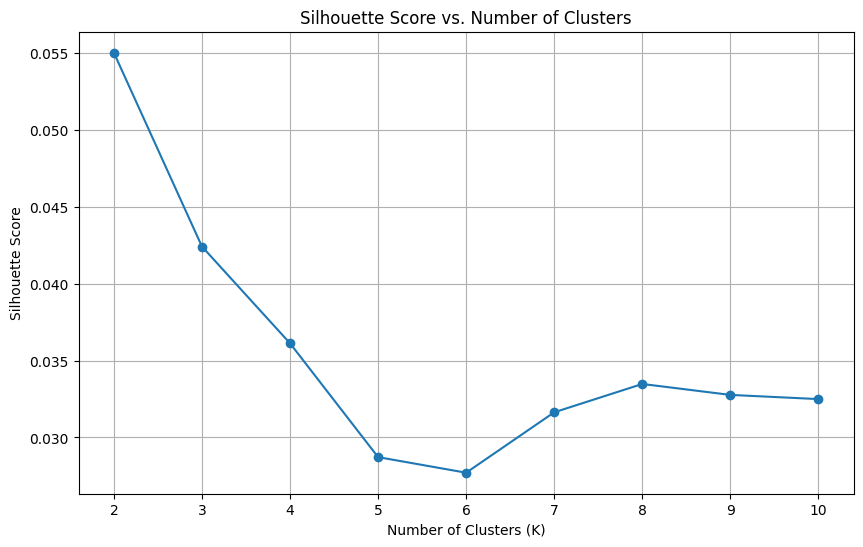

In [179]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Fitting the K-medoids model

In [180]:

# Choose the optimal number of clusters (K)
optimal_k = 4  # Adjust as needed based on the silhouette score plot

# Initialize K-medoids model with the optimal number of clusters
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)

# Fit the model to the encoded DataFrame
kmedoids.fit(df_encoded)

# Predict cluster labels
cluster_labels = kmedoids.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(df_encoded, cluster_labels)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')




Silhouette Score for 4 clusters: 0.036128118186691774


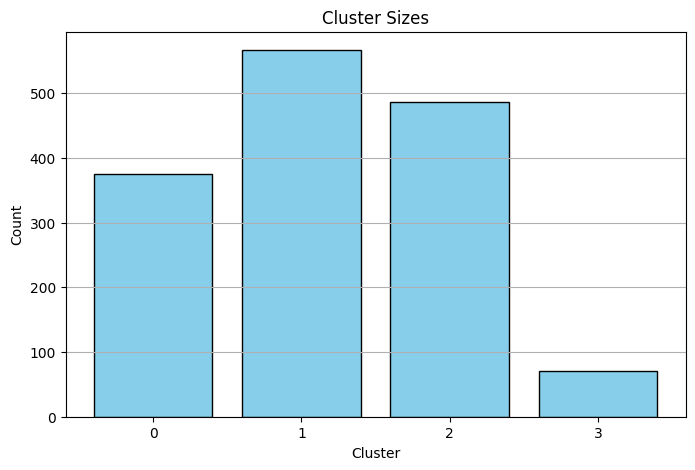

In [181]:
# Plot cluster sizes
plt.figure(figsize=(8, 5))
plt.hist(cluster_labels, bins=np.arange(optimal_k + 1) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(range(optimal_k))
plt.grid(axis='y')
plt.show()



In [182]:

# Choose the optimal number of clusters (K)
optimal_k = 3  # Adjust as needed based on the silhouette score plot

# Initialize K-medoids model with the optimal number of clusters
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)

# Fit the model to the encoded DataFrame
kmedoids.fit(df_encoded)

# Predict cluster labels
cluster_labels = kmedoids.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(df_encoded, cluster_labels)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 3 clusters: 0.04242481642128724


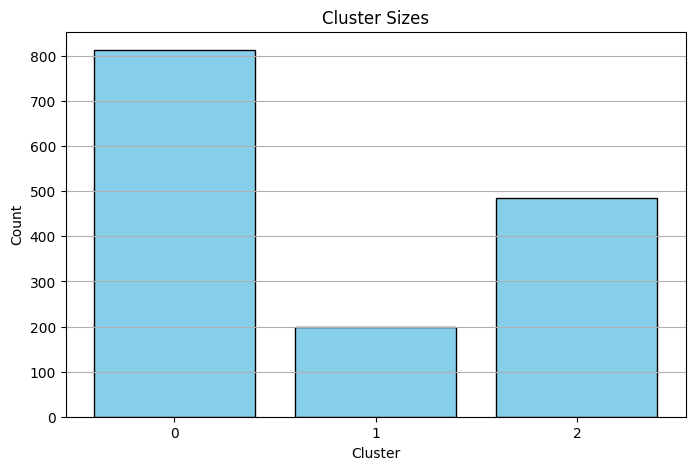

In [183]:
# Plot cluster sizes
plt.figure(figsize=(8, 5))
plt.hist(cluster_labels, bins=np.arange(optimal_k + 1) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(range(optimal_k))
plt.grid(axis='y')
plt.show()


## Hierarchical clustering

## Silhouette Score

In [184]:
# Calculate silhouette score for hierarchical clustering
# Since we haven't explicitly performed hierarchical clustering, we need to do so first
# Let's use agglomerative clustering for hierarchical clustering


# Specify the number of clusters based on the dendrogram analysis or any other criteria
# For demonstration purposes, let's choose 4 clusters
num_clusters_hierarchical = 4

# Initialize AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters_hierarchical)

# Fit the model to the encoded DataFrame
cluster_labels_hierarchical = agg_clustering.fit_predict(df_encoded)

# Calculate silhouette score for hierarchical clustering
silhouette_hierarchical = silhouette_score(df_encoded, cluster_labels_hierarchical)
print(f'Silhouette Score for hierarchical clustering: {silhouette_hierarchical}')

Silhouette Score for hierarchical clustering: 0.05371318582541217


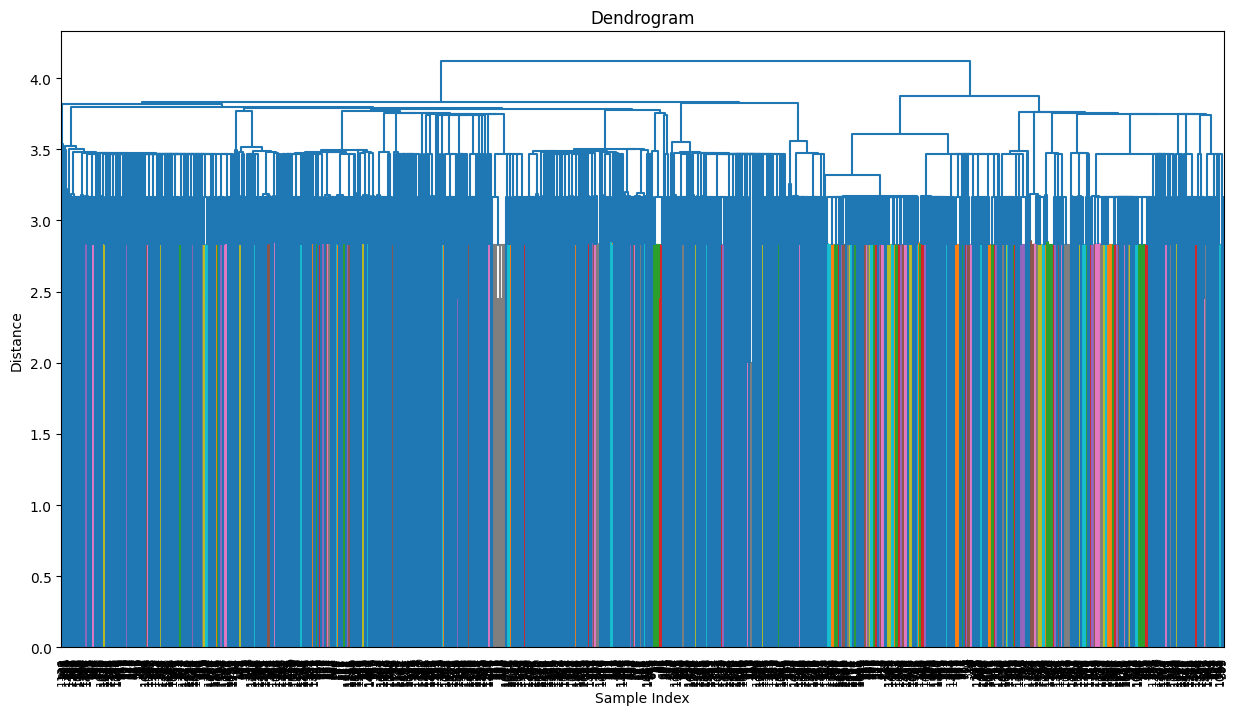

In [185]:

# Compute the linkage matrix using complete linkage
linkage_matrix = linkage(df_encoded, method='complete')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


### Evaluation of two clustering

In [186]:
# Comparison of Silhouette Scores
print(f'Silhouette Score for K-medoids clustering: {silhouette_kmedoids}')
print(f'Silhouette Score for hierarchical clustering: {silhouette_hierarchical}')


Silhouette Score for K-medoids clustering: 0.04242481642128724
Silhouette Score for hierarchical clustering: 0.05371318582541217


## Principal Component Analysis

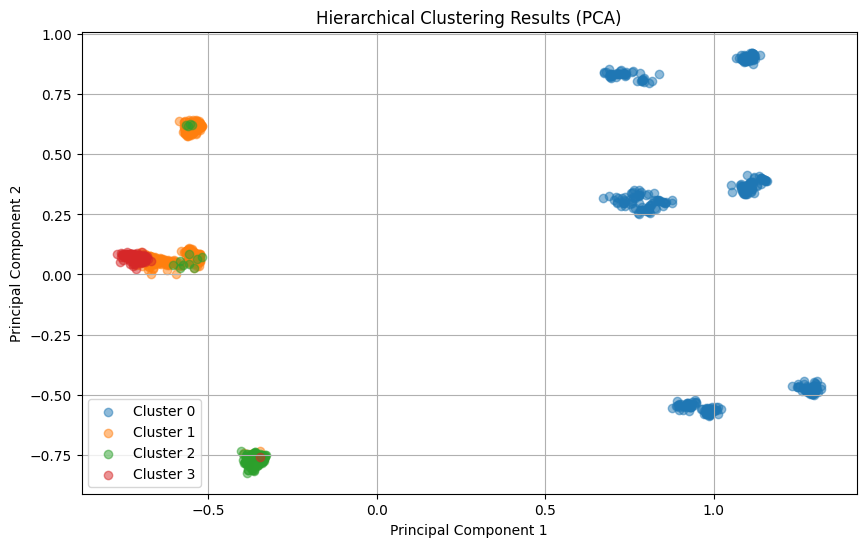

In [187]:

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded)

# Plot clusters in the reduced feature space
plt.figure(figsize=(10, 6))
for cluster in np.unique(cluster_labels_hierarchical):
    plt.scatter(pca_result[cluster_labels_hierarchical == cluster, 0], 
                pca_result[cluster_labels_hierarchical == cluster, 1], 
                label=f'Cluster {cluster}', alpha=0.5)
plt.title('Hierarchical Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
